# Object Tracking
**Satya Mallick, LearnOpenCV.com**

In [1]:
# Import modules
import cv2
import sys
import os
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import urllib

def drawRectangle(frame, bbox):
    p1 = (int(bbox[0]), int(bbox[1]))
    p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
    cv2.rectangle(frame, p1, p2, (255,0,0), 2, 1)

def displayRectangle(frame, bbox):
    plt.figure(figsize=(20,10))
    frameCopy = frame.copy()
    drawRectangle(frameCopy, bbox)
    frameCopy = cv2.cvtColor(frameCopy, cv2.COLOR_RGB2BGR)
    plt.imshow(frameCopy); plt.axis('off')    

def drawText(frame, txt, location, color = (50,170,50)):
    cv2.putText(frame, txt, location, cv2.FONT_HERSHEY_SIMPLEX, 0.75, color, 2)


# Goal 

** Given the initial location of an object, track location in subsequent frames ** 

![Object Tracking](object-tracking.jpg)

In [2]:
%%HTML
<video width="1024" controls>
  <source src="chaplin.mp4" type="video/mp4">
</video>

# Tracking Basics
![](tracking-basics.jpg)

# Tracker Class in OpenCV

1. BOOSTING
2. MIL 
3. KCF 
4. TLD 
 * Tends to recover from occulusions
5. MEDIANFLOW 
 * Good for predictable slow motion
6. GOTURN
 * Deep Learning based
 * Most Accurate 
7. MOSSE
 * Fastest

# Download tracking model (for GOTURN only)

In [3]:
if not os.path.isfile('goturn.prototxt') or not os.path.isfile('goturn.caffemodel'):
    print("Downloading GOTURN model zip file")
    urllib.request.urlretrieve('https://www.dropbox.com/sh/77frbrkmf9ojfm6/AACgY7-wSfj-LIyYcOgUSZ0Ua?dl=1', 'GOTURN.zip')
    
    # Uncompress the file
    !tar -xvf GOTURN.zip

    # Delete the zip file
    os.remove('GOTURN.zip')

tar: Removing leading '/' from member names
x .
x goturn.prototxt
x goturn.caffemodel


#GOTURN Tracker

![](goturn.jpg)

# Create the Tracker instance

In [4]:
# Set up tracker
tracker_types = ['BOOSTING', 'MIL','KCF', 'TLD', 'MEDIANFLOW', 'GOTURN','MOSSE']

# Change the index to change the tracker type
tracker_type = tracker_types[0]

if tracker_type == 'BOOSTING':
    tracker = cv2.legacy_TrackerBoosting.create()
elif tracker_type == 'MIL':
    tracker = cv2.TrackerMIL_create()
elif tracker_type == 'KCF':
    tracker = cv2.TrackerKCF_create()
elif tracker_type == 'TLD':
    tracker = cv2.legacy_TrackerTLD.create()
elif tracker_type == 'MEDIANFLOW':
    tracker = cv2.legacy_TrackerMedianFlow.create()
elif tracker_type == 'GOTURN':
    tracker = cv2.TrackerGOTURN_create()   
else:
    tracker = cv2.legacy_TrackerMOSSE.create()

# Read input video & Setup output Video

In [5]:
# Read video
video = cv2.VideoCapture("chaplin.mp4")
ok, frame = video.read()

# Exit if video not opened
if not video.isOpened():
    print("Could not open video")
    sys.exit()
else : 
    width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

video_out = cv2.VideoWriter('chaplin-' + tracker_type + '.mp4',cv2.VideoWriter_fourcc(*'avc1'), 10, (width, height))


# Define Bounding Box

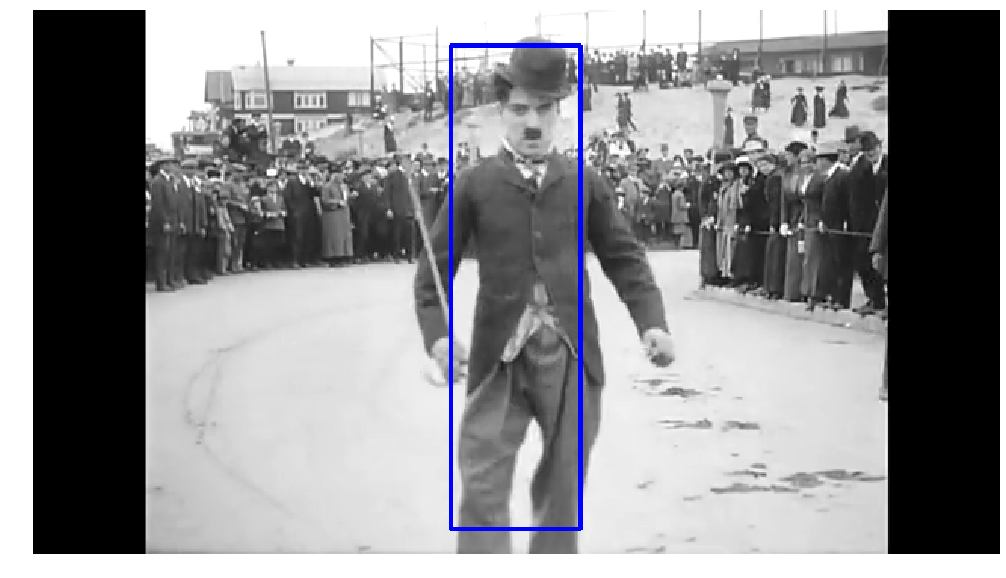

In [6]:
# Define a bounding box
bbox = (276, 23, 86, 320)
#bbox = cv2.selectROI(frame, False)

displayRectangle(frame,bbox)

# Intilialize Tracker 

1. One frame
2. A bounding box 


In [7]:
# Initialize tracker with first frame and bounding box

ok = tracker.init(frame, bbox)

# Read frame and Track Object

In [8]:
while True:
    ok, frame = video.read()
    if not ok:
        break 
    
    # Start timer
    timer = cv2.getTickCount()

    # Update tracker
    ok, bbox = tracker.update(frame)

    # Calculate Frames per second (FPS)
    fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer);

    # Draw bounding box
    if ok:
        drawRectangle(frame, bbox)
    else :
        drawText(frame, "Tracking failure detected", (100,80), (0, 0, 255))

    # Display Info
    drawText(frame, tracker_type + " Tracker", (100,20))
    drawText(frame, "FPS : " + str(int(fps)), (100,50))
    
    # Write frame to video
    video_out.write(frame)
    
video.release()
video_out.release()

In [9]:
%%HTML
<video width="1024" controls>
  <source src="chaplin-out.mp4" type="video/mp4">
</video>

# Thank You!